# データ作成

結合するデータは3個  
* Sentinel2の秋田大豆裸地のデータ　座標しかないからポリゴンに結合必要　uniqueIDを振ったのでさらにエクセルと結合して必要な値を与える
/workspaces/akita_daizu/data/sentinel_band0601.geojson  
このGeojsonをさらに下のエクセルと結合  
/workspaces/akita_daizu/data/0124修正_土壌データ+収量.xlsx  
* 田中先生からもらったCS 教師データプラス　これの整形も必要  
/workspaces/akita_daizu/data/土壌成分_波長_教師データ.csv

In [615]:
import geopandas as gpd
import pandas as pd
akita_polygon = gpd.read_file('/workspaces/akita_daizu/data/sentunel_band0601.geojson')
akita_data = pd.read_excel('/workspaces/akita_daizu/data/0208修正_土壌データ+収量.xlsx')

train_data = pd.read_csv('/workspaces/akita_daizu/data/土壌成分_波長_教師データ.csv')

In [616]:
#　まずこのデータから不要な列を削除
akita_data

,圃場番号,現場測定_EC(㎳／㎝),現場測定_PH,土壌硬度_1_mean,土壌硬度_2_mean,土壌硬度_3_mean,土壌硬度_4_mean,土壌硬度_5_mean,土壌硬度_6_mean,土壌硬度_7_mean,...,15%反収現物重量kg/10a,実験室測定_EC(㎳／㎝),実験室測定_pH,アンモニア態窒素(mgN/100g),硝酸態窒素(mgN/100g),可給隊窒素(mgN/100g),有効態リン酸(mgP2O5/100g),TC(%),腐食(%),TN(%)
0,1.0,0.028,7.36,285,486,650,779,822,887,959,...,130.0,0.041,7.26,1.53,0.62,4.40,18.5,1.00,1.72,0.106
1,2.0,0.031,6.42,232,232,232,232,232,232,232,...,NaN,0.035,6.42,1.55,1.36,2.30,11.0,0.27,0.46,0.033
2,3.0,0.027,6.30,232,232,232,232,247,334,421,...,NaN,0.029,6.56,1.58,0.13,3.85,8.0,0.36,0.62,0.040
3,4.0,0.017,6.49,232,289,325,370,411,507,669,...,NaN,0.025,6.87,1.22,0.11,4.43,15.5,0.46,0.79,0.047
4,5.0,0.058,6.69,232,295,398,579,728,1149,1336,...,138.0,0.042,7.03,1.20,0.32,4.76,40.4,0.82,1.41,0.085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,117.0,0.034,5.83,362,375,375,372,411,494,689,...,NaN,0.047,6.04,2.27,0.46,8.55,39.5,4.34,7.46,0.329
109,118.0,0.028,5.46,232,237,239,239,239,239,382,...,NaN,0.050,5.50,1.86,1.22,2.98,18.3,4.12,7.09,0.295
110,119.0,0.044,5.70,365,376,376,440,463,516,573,...,NaN,0.048,6.09,1.79,0.39,7.03,60.2,3.89,6.69,0.279
111,120.0,0.055,6.06,670,652,630,682,598,733,749,...,NaN,0.048,6.30,1.76,0.59,8.27,51.7,3.20,5.50,0.241


In [617]:
akita_data.columns

Index(['圃場番号', '現場測定_EC(㎳／㎝)', '現場測定_PH', '土壌硬度_1_mean', '土壌硬度_2_mean',
       '土壌硬度_3_mean', '土壌硬度_4_mean', '土壌硬度_5_mean', '土壌硬度_6_mean',
       '土壌硬度_7_mean', '土壌硬度_8_mean', '土壌硬度_9_mean', '土壌硬度_10_mean',
       '土壌硬度_11_mean', '土壌硬度_12_mean', '土壌硬度_13_mean', '土壌硬度_14_mean',
       '土壌硬度_15_mean', '土壌硬度_16_mean', '土壌硬度_17_mean', '土壌硬度_18_mean',
       '土壌硬度_19_mean', '土壌硬度_20_mean', '土壌硬度_21_mean', '土壌硬度_22_mean',
       '土壌硬度_23_mean', '土壌硬度_24_mean', '土壌硬度_25_mean', '土壌硬度_26_mean',
       '土壌硬度_27_mean', '土壌硬度_28_mean', '土壌硬度_29_mean', '土壌硬度_30_mean',
       '土壌硬度_31_mean', '土壌硬度_32_mean', '土壌硬度_33_mean', '土壌硬度_34_mean',
       '土壌硬度_35_mean', '土壌硬度_36_mean', '土壌硬度_37_mean', '土壌硬度_38_mean',
       '土壌硬度_39_mean', '土壌硬度_40_mean', '土壌硬度_41_mean', '土壌硬度_42_mean',
       '土壌硬度_43_mean', '土壌硬度_44_mean', '土壌硬度_45_mean', '土壌硬度_46_mean',
       '土壌硬度_47_mean', '土壌硬度_48_mean', '土壌硬度_49_mean', '土壌硬度_50_mean',
       '土壌硬度_51_mean', '土壌硬度_52_mean', '土壌硬度_53_mean', '土壌硬度_54_mean',
       '土壌硬度

In [618]:
akita_data['uniqueID'] = akita_data['圃場番号']
merge_akita_data = akita_data[[
    'uniqueID', '実験室測定_EC(㎳／㎝)', '実験室測定_pH',
       'アンモニア態窒素(mgN/100g)', '硝酸態窒素(mgN/100g)', '可給隊窒素(mgN/100g)',
       '有効態リン酸(mgP2O5/100g)', 'TC(%)', '腐食(%)', 'TN(%)'
    ]]


In [619]:
merge_akita_data

,uniqueID,実験室測定_EC(㎳／㎝),実験室測定_pH,アンモニア態窒素(mgN/100g),硝酸態窒素(mgN/100g),可給隊窒素(mgN/100g),有効態リン酸(mgP2O5/100g),TC(%),腐食(%),TN(%)
0,1.0,0.041,7.26,1.53,0.62,4.40,18.5,1.00,1.72,0.106
1,2.0,0.035,6.42,1.55,1.36,2.30,11.0,0.27,0.46,0.033
2,3.0,0.029,6.56,1.58,0.13,3.85,8.0,0.36,0.62,0.040
3,4.0,0.025,6.87,1.22,0.11,4.43,15.5,0.46,0.79,0.047
4,5.0,0.042,7.03,1.20,0.32,4.76,40.4,0.82,1.41,0.085
...,...,...,...,...,...,...,...,...,...,...
108,117.0,0.047,6.04,2.27,0.46,8.55,39.5,4.34,7.46,0.329
109,118.0,0.050,5.50,1.86,1.22,2.98,18.3,4.12,7.09,0.295
110,119.0,0.048,6.09,1.79,0.39,7.03,60.2,3.89,6.69,0.279
111,120.0,0.048,6.30,1.76,0.59,8.27,51.7,3.20,5.50,0.241


In [620]:
merged_akita = pd.merge(akita_polygon, merge_akita_data, on=['uniqueID'], how='outer')
merged_akita

,field_1,id,longitude,latitude,time,B1,B2,B3,B4,B5,...,geometry,実験室測定_EC(㎳／㎝),実験室測定_pH,アンモニア態窒素(mgN/100g),硝酸態窒素(mgN/100g),可給隊窒素(mgN/100g),有効態リン酸(mgP2O5/100g),TC(%),腐食(%),TN(%)
0,1,20210601T012659_20210601T012656_T54TVK,140.023143,40.271609,2021-06-01,534,765,1120,916,1684,...,POINT (-68903.856 30470.614),0.029,6.56,1.58,0.13,3.85,8.0,0.36,0.62,0.040
1,1,20210601T012659_20210601T012656_T54TVK,140.079917,40.280592,2021-06-01,649,702,940,971,1635,...,POINT (-64066.938 31425.426),0.060,6.09,1.80,1.17,5.57,75.7,3.83,6.59,0.294
2,1,20210601T012659_20210601T012656_T54TVK,140.080186,40.280862,2021-06-01,710,672,915,997,1619,...,POINT (-64043.767 31455.153),0.046,6.32,1.77,1.08,4.78,47.2,3.60,6.19,0.270
3,1,20210601T012659_20210601T012656_T54TVK,140.080366,40.281041,2021-06-01,710,813,1108,1124,1873,...,POINT (-64028.319 31474.971),0.050,6.37,1.69,1.24,6.63,73.2,3.57,6.14,0.260
4,1,20210601T012659_20210601T012656_T54TVK,140.022335,40.275292,2021-06-01,569,747,1001,986,1550,...,POINT (-68968.874 30880.179),0.036,6.98,1.82,0.23,4.04,33.7,0.93,1.60,0.076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,1,20210601T012659_20210601T012656_T54TVK,140.059884,40.293887,2021-06-01,479,589,851,785,1511,...,POINT (-65757.531 32916.263),0.040,6.45,1.83,0.66,4.50,46.0,4.85,8.34,0.315
471,1,20210601T012659_20210601T012656_T54TVK,140.059435,40.294785,2021-06-01,466,633,962,885,1635,...,POINT (-65794.847 33016.337),0.043,6.52,2.01,0.94,5.33,35.8,3.61,6.21,0.290
472,1,20210601T012659_20210601T012656_T54TVK,140.056920,40.293169,2021-06-01,460,619,940,924,1735,...,POINT (-66010.265 32838.675),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,1,20210601T012659_20210601T012656_T54TVK,140.067430,40.282479,2021-06-01,382,549,795,710,1384,...,POINT (-65126.937 31643.983),0.051,6.36,1.79,2.47,4.23,100.0,3.20,5.50,0.251


In [621]:
len(merged_akita['geometry'].unique())

474

In [622]:
# 不要な波長とかの削除
# 必要な波長　2、3、4、8、11、12
merged_akita.columns

Index(['field_1', 'id', 'longitude', 'latitude', 'time', 'B1', 'B2', 'B3',
       'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'AOT', 'WVP',
       'SCL', 'TCI_R', 'TCI_G', 'TCI_B', 'MSK_CLDPRB', 'MSK_SNWPRB', 'QA10',
       'QA20', 'QA60', 'uniqueID', 'geometry', '実験室測定_EC(㎳／㎝)', '実験室測定_pH',
       'アンモニア態窒素(mgN/100g)', '硝酸態窒素(mgN/100g)', '可給隊窒素(mgN/100g)',
       '有効態リン酸(mgP2O5/100g)', 'TC(%)', '腐食(%)', 'TN(%)'],
      dtype='object')

In [623]:
# 列名修正　教師データと結合するために同じ名前にする
merged_akita['NH4'] = merged_akita['アンモニア態窒素(mgN/100g)']
merged_akita['NO3'] = merged_akita['硝酸態窒素(mgN/100g)']
merged_akita['AvailN'] = merged_akita['可給隊窒素(mgN/100g)']
merged_akita['AvailP1'] = merged_akita['有効態リン酸(mgP2O5/100g)']
merged_akita['TC'] = merged_akita['TC(%)']
merged_akita['TN'] = merged_akita['TN(%)']
merged_akita['EC'] = merged_akita['実験室測定_EC(㎳／㎝)']
merged_akita['pH1'] = merged_akita['実験室測定_pH']


In [624]:
target_akita = merged_akita[['uniqueID', 'longitude', 'latitude', 'B2', 'B3',
    'B4', 'B8', 'B11', 'B12',
    # 'AOT', 'WVP','SCL', 'TCI_R', 'TCI_G', 'TCI_B', 
    # 'MSK_CLDPRB', 'MSK_SNWPRB', 'QA10','QA20', 'QA60', 
    'EC', 'pH1',
    'NH4', 'NO3', 'AvailN',
    'AvailP1', 'TC', '腐食(%)', 'TN','geometry']]

In [625]:
target_akita

,uniqueID,longitude,latitude,B2,B3,B4,B8,B11,B12,EC,pH1,NH4,NO3,AvailN,AvailP1,TC,腐食(%),TN,geometry
0,3.0,140.023143,40.271609,765,1120,916,3237,1878,1283,0.029,6.56,1.58,0.13,3.85,8.0,0.36,0.62,0.040,POINT (-68903.856 30470.614)
1,104.0,140.079917,40.280592,702,940,971,2481,2169,1451,0.060,6.09,1.80,1.17,5.57,75.7,3.83,6.59,0.294,POINT (-64066.938 31425.426)
2,105.0,140.080186,40.280862,672,915,997,2408,2258,1536,0.046,6.32,1.77,1.08,4.78,47.2,3.60,6.19,0.270,POINT (-64043.767 31455.153)
3,106.0,140.080366,40.281041,813,1108,1124,2910,2399,1747,0.050,6.37,1.69,1.24,6.63,73.2,3.57,6.14,0.260,POINT (-64028.319 31474.971)
4,10.0,140.022335,40.275292,747,1001,986,2592,1891,1273,0.036,6.98,1.82,0.23,4.04,33.7,0.93,1.60,0.076,POINT (-68968.874 30880.179)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,41.0,140.059884,40.293887,589,851,785,2499,2287,1519,0.040,6.45,1.83,0.66,4.50,46.0,4.85,8.34,0.315,POINT (-65757.531 32916.263)
471,44.0,140.059435,40.294785,633,962,885,2643,2179,1470,0.043,6.52,2.01,0.94,5.33,35.8,3.61,6.21,0.290,POINT (-65794.847 33016.337)
472,37.0,140.056920,40.293169,619,940,924,2749,2052,1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-66010.265 32838.675)
473,75.0,140.067430,40.282479,549,795,710,2461,1554,935,0.051,6.36,1.79,2.47,4.23,100.0,3.20,5.50,0.251,POINT (-65126.937 31643.983)


In [626]:
# nullチェック 予測したいポリゴンだけ予測したいパラメータがnull
print(target_akita.isnull().sum())

uniqueID     353
longitude      0
latitude       0
B2             0
B3             0
B4             0
B8             0
B11            0
B12            0
EC           362
pH1          362
NH4          362
NO3          362
AvailN       362
AvailP1      362
TC           362
腐食(%)        362
TN           362
geometry       0
dtype: int64


In [627]:
target_akita[target_akita.duplicated()]

,uniqueID,longitude,latitude,B2,B3,B4,B8,B11,B12,EC,pH1,NH4,NO3,AvailN,AvailP1,TC,腐食(%),TN,geometry
60,NaN,140.077042,40.272148,609,889,875,2791,1870,1121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-64319.384 30489.949)


In [628]:
target_akita = target_akita[~target_akita.duplicated()]

In [629]:
# 学習データの整理完了
target_akita

,uniqueID,longitude,latitude,B2,B3,B4,B8,B11,B12,EC,pH1,NH4,NO3,AvailN,AvailP1,TC,腐食(%),TN,geometry
0,3.0,140.023143,40.271609,765,1120,916,3237,1878,1283,0.029,6.56,1.58,0.13,3.85,8.0,0.36,0.62,0.040,POINT (-68903.856 30470.614)
1,104.0,140.079917,40.280592,702,940,971,2481,2169,1451,0.060,6.09,1.80,1.17,5.57,75.7,3.83,6.59,0.294,POINT (-64066.938 31425.426)
2,105.0,140.080186,40.280862,672,915,997,2408,2258,1536,0.046,6.32,1.77,1.08,4.78,47.2,3.60,6.19,0.270,POINT (-64043.767 31455.153)
3,106.0,140.080366,40.281041,813,1108,1124,2910,2399,1747,0.050,6.37,1.69,1.24,6.63,73.2,3.57,6.14,0.260,POINT (-64028.319 31474.971)
4,10.0,140.022335,40.275292,747,1001,986,2592,1891,1273,0.036,6.98,1.82,0.23,4.04,33.7,0.93,1.60,0.076,POINT (-68968.874 30880.179)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,41.0,140.059884,40.293887,589,851,785,2499,2287,1519,0.040,6.45,1.83,0.66,4.50,46.0,4.85,8.34,0.315,POINT (-65757.531 32916.263)
471,44.0,140.059435,40.294785,633,962,885,2643,2179,1470,0.043,6.52,2.01,0.94,5.33,35.8,3.61,6.21,0.290,POINT (-65794.847 33016.337)
472,37.0,140.056920,40.293169,619,940,924,2749,2052,1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-66010.265 32838.675)
473,75.0,140.067430,40.282479,549,795,710,2461,1554,935,0.051,6.36,1.79,2.47,4.23,100.0,3.20,5.50,0.251,POINT (-65126.937 31643.983)


In [630]:
# 教師データの整理をどのタイミングでするか？　
# 結合した後にDropすると学習データまで落としてしまうので、学習するたびに必要なデータを結合する方法に変更
train_data.columns

Index(['no', 'id1', 'id2', 'Date', 'Pref', 'Location', 'LandUse', 'Crop',
       'Farmer', 'Collector', 'Field name in KSAS', 'x', 'y', 'x_53n', 'y_53n',
       'dsm_AW3D30', 'AcquisitionDate_S2', 'B2', 'B3', 'B4', 'B8', 'B11',
       'B12', 'AcquisitionId_S1', 'type', 'VV', 'VH', 'Layer', 'pH1', 'pH2',
       'EC', 'Y1', 'Humus', 'CS', 'FS', 'Sand', 'Silt', 'Clay', 'TC', 'TN',
       'CEC', 'CaO', 'MgO', 'K2O', 'Na2O', 'BaseSaturation', 'PAcidAbsCoef',
       'AvailP1', 'AvailP2', 'AvailSi1', 'AvailSi2', 'HotAvailN', 'AvailN',
       'UplandAvailN', 'NH4', 'NO3', 'InorgN', 'FreeIron', 'WaterExB', 'Mn',
       'SoilTypeName3', 'SoilTypeNum', 'SoilTypeName2', 'SoilTaxon'],
      dtype='object')

In [631]:
droped_train_data = train_data[[
    'B2', 'B3', 'B4', 'B8', 'B11','B12',
    'pH1','EC',
    'NH4', 'NO3', 'AvailN',
    'AvailP1', 'TC', 'TN',
]]
droped_train_data = droped_train_data.dropna(subset=['B2', 'B3', 'B4', 'B8', 'B11','B12'])
# 学習データと比べて、教師データはバンド値が10000分の1なので
band_cols = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12']
droped_train_data[band_cols] = droped_train_data[band_cols] * 10000

In [689]:
# 教師データの整形完了、concatは学習させるタイミングで実施
droped_train_data

,B2,B3,B4,B8,B11,B12,pH1,EC,NH4,NO3,AvailN,AvailP1,TC,TN
0,543.0,621.0,777.0,1232.0,2202.0,1611.0,5.51,0.07,0.946,0.105,NaN,9.458,3.867726,0.331129
1,584.0,707.0,929.0,1482.0,2236.0,1707.0,5.28,0.05,1.039,0.208,NaN,4.155,3.208708,0.267248
2,813.0,907.0,1250.0,1996.0,2866.0,2408.0,5.67,0.05,0.932,0.311,NaN,10.360,2.859232,0.240865
3,453.0,531.0,717.0,1250.0,2204.0,1524.0,5.69,0.08,0.952,0.106,NaN,10.575,3.996550,0.320280
4,689.0,871.0,1148.0,1844.0,2560.0,1965.0,5.66,0.05,1.149,0.104,NaN,3.134,2.754002,0.241536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,1130.0,1390.0,1832.0,2555.0,3803.0,3539.0,5.96,5.09,NaN,NaN,17.776014,NaN,5.704551,NaN
1181,1046.0,1302.0,1710.0,2476.0,3740.0,3431.0,5.94,5.40,NaN,NaN,8.528544,NaN,5.688195,NaN
1182,1120.0,1534.0,2082.0,2724.0,3740.0,3142.0,6.10,4.11,NaN,NaN,13.546059,NaN,2.639054,NaN
1183,550.0,810.0,1058.0,1474.0,2214.0,1676.0,5.72,3.70,NaN,NaN,9.177537,NaN,2.754787,NaN


# 組み合わせた教師・学習データから予測

In [633]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [821]:
# 予測データ結合用DFの作成
pred_df = target_akita[['longitude','latitude','B2', 'B3', 'B4', 'B8', 'B11','B12']].reset_index(drop=True)

pipeline作成

In [845]:
'''
ランダムフォレスト、勾配ブースティング、XGBoostの3モデル比較
交差検証 Repeated Kfold
Gridsearch n_estimatorsとmax_depth　estimatorsは指定しなくても良いと思う early stopを入れる
'''

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
import xgboost

def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=True)

# build pipeline
def build_pipelines():
    random_seed = 42
    pipelines = {
        'Rfr':
            Pipeline([('scl',StandardScaler()),
                    ('est',RandomForestRegressor(random_state=random_seed))]),
        'Gbr':
            Pipeline([('scl',StandardScaler()),
                    ('est',GradientBoostingRegressor(random_state=random_seed))]),
        'Xgb':
            Pipeline([('scl',StandardScaler()),
                    ('est',xgboost.XGBRegressor(random_state=random_seed))])
    }
    return(pipelines)

def pipe_score_predict(XX, YY, pred_df):
    train_x, test_x, train_y, test_y = train_test_split(
        XX, YY, test_size=0.3, random_state=42, shuffle=True)

    
    scores = pd.DataFrame()
    preds_df = pd.DataFrame()

    pipelines =  build_pipelines()

    for pipe_name, pipeline in pipelines.items():
        rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
        rf_tune_params = {'est__n_estimators': [8, 16, 32, 64, 128, 256, 512],
                        'est__max_depth': [2,4,6]}
        clf_pipeline = GridSearchCV(pipeline,rf_tune_params, cv=rkf, refit=True)
        clf_pipeline.fit(train_x, train_y)
        scores.loc[pipe_name,'train_rmse'] = rmse(train_y, clf_pipeline.predict(train_x))
        scores.loc[pipe_name,'test_rmse'] = rmse(test_y, clf_pipeline.predict(test_x))
        scores.loc[pipe_name,'train_r2_score'] = r2_score(train_y, clf_pipeline.predict(train_x))
        scores.loc[pipe_name,'test_r2_score'] = r2_score(test_y, clf_pipeline.predict(test_x))

        best_model = clf_pipeline.best_estimator_
        
        #3モデルの予測値をｄｆに格納
        preds_df["pred" + pipe_name + target_col] = best_model.predict(pred_df[band_cols])

    #　3モデル予測値の平均を予測値として代入
    pred_df["pred" + target_col] = preds_df.mean(axis=1)

    
    return(scores, pred_df)

アーリーストッピングテスト

In [844]:
'''
アーリーストッピングの実装　できたら上のセルに統合
'''

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
import xgboost

def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=True)

# build pipeline
def build_pipelines():
    params = {
    'n_estimators': 10000,
    'random_seed' : 42
    }
    pipelines = {
        'Rfr':
            Pipeline([('scl',StandardScaler()),
                    ('est',RandomForestRegressor(**params))]),
        'Gbr':
            Pipeline([('scl',StandardScaler()),
                    ('est',GradientBoostingRegressor(**params))]),
        'Xgb':
            Pipeline([('scl',StandardScaler()),
                    ('est',xgboost.XGBRegressor(**params))])
    }
    return(pipelines)

def pipe_score_predict(XX, YY, pred_df):
    train_x, test_x, train_y, test_y = train_test_split(
        XX, YY, test_size=0.3, random_state=42, shuffle=True)

    
    scores = pd.DataFrame()
    preds_df = pd.DataFrame()

    pipelines =  build_pipelines()

    for pipe_name, pipeline in pipelines.items():
        rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
        rf_tune_params = {'est__n_estimators': [8, 16, 32, 64, 128, 256, 512],
                        'est__max_depth': [2,4,6]}
        fit_params = {"early_stopping_rounds": 100,
                    "eval_set": [[test_x, test_y]]}
        clf_pipeline = GridSearchCV(pipeline,rf_tune_params,fit_params = fit_params, cv=rkf, refit=True)
        clf_pipeline.fit(train_x, train_y)
        scores.loc[pipe_name,'train_rmse'] = rmse(train_y, clf_pipeline.predict(train_x))
        scores.loc[pipe_name,'test_rmse'] = rmse(test_y, clf_pipeline.predict(test_x))
        scores.loc[pipe_name,'train_r2_score'] = r2_score(train_y, clf_pipeline.predict(train_x))
        scores.loc[pipe_name,'test_r2_score'] = r2_score(test_y, clf_pipeline.predict(test_x))

        best_model = clf_pipeline.best_estimator_
        
        #3モデルの予測値をｄｆに格納
        preds_df["pred" + pipe_name + target_col] = best_model.predict(pred_df[band_cols])

    #　3モデル予測値の平均を予測値として代入
    pred_df["pred" + target_col] = preds_df.mean(axis=1)

    
    return(scores, pred_df)

## ｐHの予測

In [824]:
lat_lon = ['longitude','latitude']
band_cols = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12']
# ここを書き換える
target_col = 'pH1'
droped_target_akita = target_akita[lat_lon + band_cols + [target_col]]
droped_train_data2 = droped_train_data.dropna(subset=[target_col])
droped_train_data2 = droped_train_data2[band_cols + [target_col]]
ddf_concat = pd.concat([droped_target_akita, droped_train_data2])

In [825]:
# 予測用のデータを分ける このpred_dに学習したモデルを適用して予測値をappendしていく
pred_d= ddf_concat[ddf_concat[target_col].isnull()]
# latlon 入っていない行は教師データ、教師データでも一部教師データがない列がある　concatする前にDropが必要
d = ddf_concat.dropna(subset=[target_col])
d.isna().sum()

longitude    934
latitude     934
B2             0
B3             0
B4             0
B8             0
B11            0
B12            0
pH1            0
dtype: int64

In [826]:
# pH異常値除去
ｄ = ｄ.drop(ｄ[ｄ['pH1']>7.9].index)

In [827]:
train_x, test_x, train_y, test_y = train_test_split(d[band_cols], d[target_col], test_size=0.3, random_state=42, shuffle=True)

model = RandomForestRegressor(random_state=42)
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=True)
model.fit(train_x, train_y)

RandomForestRegressor(random_state=42)

In [828]:
# gridsearch・交差検証してない予測
preds = model.predict(test_x)
print(f'rmse: {rmse(test_y, preds)}')
print(f'rsquared: {r2_score(test_y, preds)}')

rmse: 0.1292326376676434
rsquared: 0.4952957958839421


In [829]:
# パイプラインでの予測
XX = d[band_cols]
YY = d[target_col]
scores, pred_df = pipe_score_predict(XX,YY,pred_df)
scores


,train_rmse,test_rmse,train_r2_score,test_r2_score
Rfr,0.070801,0.138558,0.671134,0.458877
Gbr,0.028619,0.140426,0.867069,0.451581
Xgb,0.032149,0.122779,0.850670,0.520498


In [704]:
len(pred_df[band_cols])

474

In [706]:
pred_df.to_csv('/workspaces/akita_daizu/testout.csv')

In [702]:
pred_df.isna().sum()

longitude    0
latitude     0
B2           0
B3           0
B4           0
B8           0
B11          0
B12          0
predpH1      1
dtype: int64

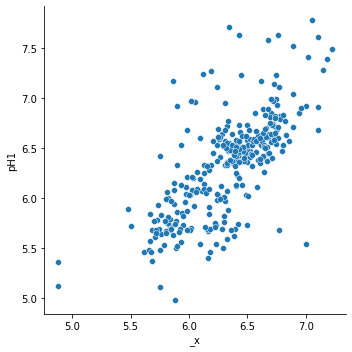

In [700]:
sns.relplot(x=preds, y=test_y)

In [292]:
# 交差検証とgridsearch　
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
rf_tune_params = {'n_estimators': [8, 16, 32, 64, 128, 256, 512]}
clf = GridSearchCV(model, rf_tune_params, cv=rkf)
clf.fit(train_x, train_y)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': [8, 16, 32, 64, 128, 256, 512]})

In [293]:
pd.DataFrame.from_dict(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.029023,0.007950,0.002819,0.001609,8,{'n_estimators': 8},0.322491,0.302991,0.530597,0.467790,...,0.437554,0.294392,0.376620,0.301603,0.514747,0.440527,0.555218,0.417800,0.083953,7
1,0.043009,0.007095,0.002717,0.002511,16,{'n_estimators': 16},0.379489,0.365443,0.495513,0.500521,...,0.489740,0.342759,0.405110,0.339202,0.500348,0.479681,0.571819,0.449992,0.067618,6
2,0.086641,0.015219,0.003782,0.001224,32,{'n_estimators': 32},0.363365,0.430112,0.489455,0.536964,...,0.494234,0.355598,0.388264,0.393863,0.504081,0.487650,0.568414,0.462178,0.065945,5
3,0.168368,0.015227,0.005441,0.001302,64,{'n_estimators': 64},0.352294,0.423242,0.475482,0.562166,...,0.505674,0.383049,0.409006,0.401017,0.496866,0.504759,0.590506,0.469560,0.067483,4
4,0.429908,0.082772,0.013675,0.004978,128,{'n_estimators': 128},0.346027,0.421789,0.465787,0.563132,...,0.528499,0.384303,0.421951,0.412319,0.501923,0.515189,0.593190,0.475281,0.069758,3
5,0.654097,0.063538,0.019381,0.003236,256,{'n_estimators': 256},0.344286,0.430122,0.457544,0.559608,...,0.534448,0.397422,0.428475,0.412040,0.503917,0.520893,0.601899,0.479741,0.070241,2
6,1.339786,0.141233,0.033663,0.004171,512,{'n_estimators': 512},0.351081,0.433407,0.449169,0.560376,...,0.536649,0.404107,0.428960,0.416986,0.499616,0.523062,0.603752,0.480116,0.068424,1


In [294]:
# gridseachのベストの結果でモデル作り直し
best_model = clf.best_estimator_
best_model.fit(train_x, train_y)

RandomForestRegressor(n_estimators=512, random_state=42)

In [295]:
# 各波長の影響度確認
pd.DataFrame.from_dict(dict(zip(band_cols, [[f] for f in best_model.feature_importances_])))

,B2,B3,B4,B8,B11,B12
0,0.135721,0.288571,0.11467,0.199754,0.166813,0.094472


In [296]:
best_preds = best_model.predict(test_x)
print(f'rmse: {rmse(test_y, best_preds)}')
print(f'rsquared: {r2_score(test_y, best_preds)}')

rmse: 0.1278718079405541
rsquared: 0.5006103704120455


In [297]:
# 事前に分けてた予測用のデータで予測
pred_df["pred" + target_col] = best_model.predict(pred_df[band_cols])


/tmp/ipykernel_361/1100787620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df["pred" + target_col] = best_model.predict(pred_df[band_cols])


In [298]:
pred_df

,longitude,latitude,B2,B3,B4,B8,B11,B12,predpH1
0,140.023143,40.271609,765,1120,916,3237,1878,1283,6.558086
1,140.079917,40.280592,702,940,971,2481,2169,1451,6.161719
2,140.080186,40.280862,672,915,997,2408,2258,1536,6.144316
3,140.080366,40.281041,813,1108,1124,2910,2399,1747,6.445898
4,140.022335,40.275292,747,1001,986,2592,1891,1273,6.756895
...,...,...,...,...,...,...,...,...,...
471,140.059884,40.293887,589,851,785,2499,2287,1519,6.192598
472,140.059435,40.294785,633,962,885,2643,2179,1470,6.292090
473,140.056920,40.293169,619,940,924,2749,2052,1300,6.435977
474,140.067430,40.282479,549,795,710,2461,1554,935,6.374434


In [299]:
# 目的不明？　湯原さんに確認
preds = []
for idx, (train_idx, test_idx) in enumerate(rkf.split(train_x, train_y)):
    print(f'num of: {idx}')
    rkf_train_x = train_x.iloc[train_idx]
    rkf_train_y = train_y.iloc[train_idx]
    rkf_test_x = train_x.iloc[test_idx]
    rkf_test_y = train_y.iloc[test_idx]

    best_model.fit(rkf_train_x, rkf_train_y)
    rkf_preds = best_model.predict(rkf_test_x)
    pred = best_model.predict(test_x)
    preds.append(pred)
    print(f'rmse: {rmse(rkf_test_y, rkf_preds)}')
    print(f'rsquared: {r2_score(rkf_test_y, rkf_preds)}')

num of: 0
rmse: 0.13503126844047184
rsquared: 0.35108124318425893
num of: 1
rmse: 0.12684631484171519
rsquared: 0.43340707997772787
num of: 2
rmse: 0.13038373972900594
rsquared: 0.4491688511386107
num of: 3
rmse: 0.09439998090689199
rsquared: 0.5603761387253847
num of: 4
rmse: 0.08345655665138624
rsquared: 0.49135021949625546
num of: 5
rmse: 0.08902973930031949
rsquared: 0.5799052472613877
num of: 6
rmse: 0.10356578198824465
rsquared: 0.4531697531052692
num of: 7
rmse: 0.1443853684955975
rsquared: 0.47015335728650776
num of: 8
rmse: 0.09505552165870591
rsquared: 0.5366491941691984
num of: 9
rmse: 0.1107527264168977
rsquared: 0.4041069727550116
num of: 10
rmse: 0.122355622730569
rsquared: 0.42896003600105215
num of: 11
rmse: 0.10611992566761444
rsquared: 0.41698598943100185
num of: 12
rmse: 0.1203493368728067
rsquared: 0.4996160256278672
num of: 13
rmse: 0.09919039024470067
rsquared: 0.5230617655942009
num of: 14
rmse: 0.08796476730653516
rsquared: 0.6037520097429403


In [300]:
preds_mean = np.array(preds).mean(axis=0)

In [301]:
preds_mean.shape

(308,)

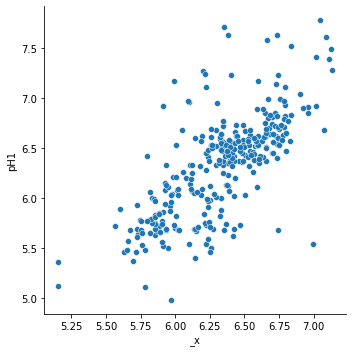

In [302]:
sns.relplot(x=preds_mean, y=test_y)

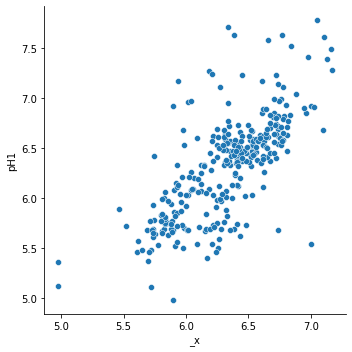

In [303]:
sns.relplot(x=best_preds, y=test_y)

## EC の単位にブレアリ　要修正　ECの予測

In [831]:
lat_lon = ['longitude','latitude']
band_cols = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12']
# ここを書き換える
target_col = 'EC'

droped_target_akita = target_akita[lat_lon + band_cols + [target_col]]
droped_train_data2 = droped_train_data.dropna(subset=[target_col])
droped_train_data2 = droped_train_data2[band_cols + [target_col]]
ddf_concat = pd.concat([droped_target_akita, droped_train_data2])

In [832]:
# 予測用のデータを分ける このpred_dに学習したモデルを適用して予測値をappendしていく
pred_d= ddf_concat[ddf_concat[target_col].isnull()]
# latlon 入っていない行は教師データ、教師データでも一部教師データがない列がある　concatする前にDropが必要
d = ddf_concat.dropna(subset=[target_col])
d.isna().sum()

longitude    934
latitude     934
B2             0
B3             0
B4             0
B8             0
B11            0
B12            0
EC             0
dtype: int64

In [833]:
# 異常値除去
ｄ = ｄ.drop(ｄ[ｄ[target_col]>0.2].index)

In [834]:
train_x, test_x, train_y, test_y = train_test_split(d[band_cols], d[target_col], test_size=0.3, random_state=42, shuffle=True)

model = RandomForestRegressor(random_state=42)
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=True)
model.fit(train_x, train_y)
# gridsearch・交差検証してない予測
preds = model.predict(test_x)
print(f'rmse: {rmse(test_y, preds)}')
print(f'rsquared: {r2_score(test_y, preds)}')

rmse: 0.0004284699253881223
rsquared: 0.4438461145990079


In [835]:
# パイプラインでの予測
XX = d[band_cols]
YY = d[target_col]
scores, pred_df = pipe_score_predict(XX,YY,pred_df)
scores

,train_rmse,test_rmse,train_r2_score,test_r2_score
Rfr,0.000163,0.000448,0.673138,0.417910
Gbr,0.000132,0.000461,0.735924,0.401729
Xgb,0.000116,0.000420,0.767636,0.455054


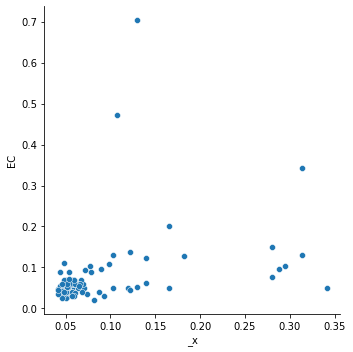

In [771]:
# ECの単位が混在している。用修正
sns.relplot(x=preds, y=test_y)

In [ ]:
# 交差検証とgridsearch　
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
rf_tune_params = {'n_estimators': [8, 16, 32, 64, 128, 256, 512]}
clf = GridSearchCV(model, rf_tune_params, cv=rkf)
clf.fit(train_x, train_y)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': [8, 16, 32, 64, 128, 256, 512]})

In [ ]:
pd.DataFrame.from_dict(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019334,0.007302,0.001546,0.000430,8,{'n_estimators': 8},0.322491,0.302991,0.530597,0.467790,...,0.437554,0.294392,0.376620,0.301603,0.514747,0.440527,0.555218,0.417800,0.083953,7
1,0.036975,0.011688,0.002286,0.001122,16,{'n_estimators': 16},0.379489,0.365443,0.495513,0.500521,...,0.489740,0.342759,0.405110,0.339202,0.500348,0.479681,0.571819,0.449992,0.067618,6
2,0.066010,0.032799,0.003014,0.002308,32,{'n_estimators': 32},0.363365,0.430112,0.489455,0.536964,...,0.494234,0.355598,0.388264,0.393863,0.504081,0.487650,0.568414,0.462178,0.065945,5
3,0.103942,0.005879,0.003211,0.000228,64,{'n_estimators': 64},0.352294,0.423242,0.475482,0.562166,...,0.505674,0.383049,0.409006,0.401017,0.496866,0.504759,0.590506,0.469560,0.067483,4
4,0.230642,0.025480,0.006651,0.001190,128,{'n_estimators': 128},0.346027,0.421789,0.465787,0.563132,...,0.528499,0.384303,0.421951,0.412319,0.501923,0.515189,0.593190,0.475281,0.069758,3
5,0.490042,0.088994,0.012818,0.002949,256,{'n_estimators': 256},0.344286,0.430122,0.457544,0.559608,...,0.534448,0.397422,0.428475,0.412040,0.503917,0.520893,0.601899,0.479741,0.070241,2
6,0.876640,0.036413,0.022180,0.001307,512,{'n_estimators': 512},0.351081,0.433407,0.449169,0.560376,...,0.536649,0.404107,0.428960,0.416986,0.499616,0.523062,0.603752,0.480116,0.068424,1


In [ ]:
# gridseachのベストの結果でモデル作り直し
best_model = clf.best_estimator_
best_model.fit(train_x, train_y)

RandomForestRegressor(n_estimators=512, random_state=42)

In [ ]:
# 各波長の影響度確認
pd.DataFrame.from_dict(dict(zip(band_cols, [[f] for f in best_model.feature_importances_])))

,B2,B3,B4,B8,B11,B12
0,0.135721,0.288571,0.11467,0.199754,0.166813,0.094472


In [ ]:
best_preds = best_model.predict(test_x)
print(f'rmse: {rmse(test_y, best_preds)}')
print(f'rsquared: {r2_score(test_y, best_preds)}')

rmse: 0.1278718079405541
rsquared: 0.5006103704120455


In [ ]:
sns.relplot(x=best_preds, y=test_y)

In [ ]:
# 事前に分けてた予測用のデータで予測
pred_df["pred" + target_col] = best_model.predict(pred_df[band_cols])


/tmp/ipykernel_361/1100787620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df["pred" + target_col] = best_model.predict(pred_df[band_cols])


In [ ]:
pred_df

,longitude,latitude,B2,B3,B4,B8,B11,B12,predpH1
0,140.023143,40.271609,765,1120,916,3237,1878,1283,6.558086
1,140.079917,40.280592,702,940,971,2481,2169,1451,6.161719
2,140.080186,40.280862,672,915,997,2408,2258,1536,6.144316
3,140.080366,40.281041,813,1108,1124,2910,2399,1747,6.445898
4,140.022335,40.275292,747,1001,986,2592,1891,1273,6.756895
...,...,...,...,...,...,...,...,...,...
471,140.059884,40.293887,589,851,785,2499,2287,1519,6.192598
472,140.059435,40.294785,633,962,885,2643,2179,1470,6.292090
473,140.056920,40.293169,619,940,924,2749,2052,1300,6.435977
474,140.067430,40.282479,549,795,710,2461,1554,935,6.374434


## NH4の予測

In [837]:
lat_lon = ['longitude','latitude']
band_cols = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12']
# ここを書き換える
target_col = 'NH4'

droped_target_akita = target_akita[lat_lon + band_cols + [target_col]]
droped_train_data2 = droped_train_data.dropna(subset=[target_col])
droped_train_data2 = droped_train_data2[band_cols + [target_col]]
ddf_concat = pd.concat([droped_target_akita, droped_train_data2])

In [838]:
# 予測用のデータを分ける このpred_dに学習したモデルを適用して予測値をappendしていく
pred_d= ddf_concat[ddf_concat[target_col].isnull()]
# latlon 入っていない行は教師データ、教師データでも一部教師データがない列がある　concatする前にDropが必要
d = ddf_concat.dropna(subset=[target_col])
d.isna().sum()

longitude    983
latitude     983
B2             0
B3             0
B4             0
B8             0
B11            0
B12            0
NH4            0
dtype: int64

In [839]:
# 異常値除去　教師データに異常値とも取れる高い値が多い印象。　
ｄ = ｄ.drop(ｄ[ｄ[target_col]>4].index)

In [840]:
train_x, test_x, train_y, test_y = train_test_split(d[band_cols], d[target_col], test_size=0.3, random_state=42, shuffle=True)

model = RandomForestRegressor(random_state=42)
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=True)
model.fit(train_x, train_y)
# gridsearch・交差検証してない予測
preds = model.predict(test_x)
print(f'rmse: {rmse(test_y, preds)}')
print(f'rsquared: {r2_score(test_y, preds)}')

rmse: 0.32881671528948114
rsquared: 0.07054686153877965


In [843]:
# パイプラインでの予測
XX = d[band_cols]
YY = d[target_col]
scores, pred_df = pipe_score_predict(XX,YY,pred_df)
scores

,train_rmse,test_rmse,train_r2_score,test_r2_score
Rfr,0.169797,0.337053,0.494609,0.047266
Gbr,0.163460,0.346807,0.513470,0.019694
Xgb,0.183520,0.341867,0.453764,0.033657


In [846]:
pred_df

,longitude,latitude,B2,B3,B4,B8,B11,B12,predpH1,predEC,predNH4
0,140.023143,40.271609,765,1120,916,3237,1878,1283,6.515323,0.043513,1.659012
1,140.079917,40.280592,702,940,971,2481,2169,1451,6.214794,0.050601,1.284878
2,140.080186,40.280862,672,915,997,2408,2258,1536,6.265614,0.049731,1.117017
3,140.080366,40.281041,813,1108,1124,2910,2399,1747,6.429461,0.047443,1.330607
4,140.022335,40.275292,747,1001,986,2592,1891,1273,6.538059,0.047738,1.552538
...,...,...,...,...,...,...,...,...,...,...,...
469,140.059884,40.293887,589,851,785,2499,2287,1519,6.277952,0.051777,1.233729
470,140.059435,40.294785,633,962,885,2643,2179,1470,6.277745,0.048702,1.256500
471,140.056920,40.293169,619,940,924,2749,2052,1300,6.379563,0.050026,1.533884
472,140.067430,40.282479,549,795,710,2461,1554,935,6.387747,0.049978,1.452588


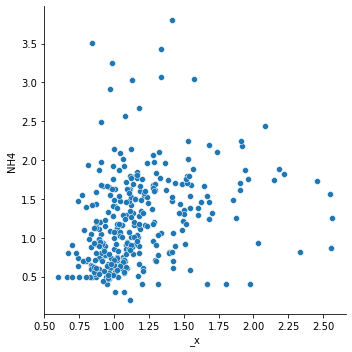

In [388]:
sns.relplot(x=preds, y=test_y)

In [324]:
# 交差検証とgridsearch　
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
rf_tune_params = {'n_estimators': [8, 16, 32, 64, 128, 256, 512]}
clf = GridSearchCV(model, rf_tune_params, cv=rkf)
clf.fit(train_x, train_y)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': [8, 16, 32, 64, 128, 256, 512]})

In [329]:
pd.DataFrame.from_dict(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025665,0.012303,0.002868,0.002352,8,{'n_estimators': 8},-0.045044,-0.060416,0.015032,-0.019985,...,-0.117764,0.048263,-0.257291,0.136371,0.074267,-0.010114,0.034422,-0.000467,0.096117,7
1,0.029001,0.000885,0.001404,0.000168,16,{'n_estimators': 16},-0.028100,-0.000236,0.083898,0.042562,...,0.063514,0.085665,-0.118257,0.133127,0.098894,-0.009487,0.053165,0.054720,0.072354,6
2,0.068908,0.016120,0.003113,0.001784,32,{'n_estimators': 32},-0.036181,0.056246,0.090995,0.116918,...,0.115370,0.134637,-0.052430,0.130541,0.098554,0.061805,0.110549,0.081879,0.063065,5
3,0.178067,0.038220,0.007595,0.006070,64,{'n_estimators': 64},-0.018659,0.079182,0.151252,0.150349,...,0.167078,0.177760,-0.026459,0.120274,0.111834,0.079405,0.113284,0.106072,0.063662,4
4,0.277471,0.056277,0.007378,0.002011,128,{'n_estimators': 128},-0.030300,0.106653,0.139209,0.140499,...,0.160298,0.175568,-0.028489,0.114182,0.136694,0.092101,0.110466,0.108420,0.066122,3
5,0.642013,0.165334,0.016836,0.005120,256,{'n_estimators': 256},-0.009976,0.104793,0.139129,0.144693,...,0.172504,0.168792,-0.018885,0.118919,0.141459,0.074215,0.125614,0.111030,0.062642,2
6,1.037171,0.118604,0.029190,0.009526,512,{'n_estimators': 512},0.009499,0.117567,0.125788,0.153129,...,0.172982,0.176312,-0.013289,0.144025,0.145697,0.079514,0.119194,0.115580,0.057764,1


In [331]:
# 各波長の影響度確認
pd.DataFrame.from_dict(dict(zip(band_cols, [[f] for f in best_model.feature_importances_])))

,B2,B3,B4,B8,B11,B12
0,0.11619,0.126084,0.145436,0.312806,0.15745,0.142033


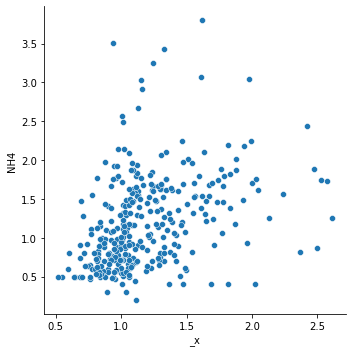

In [335]:
sns.relplot(x=best_preds, y=test_y)

In [333]:
# 事前に分けてた予測用のデータで予測
pred_df["pred" + target_col] = best_model.predict(pred_df[band_cols])


/tmp/ipykernel_361/1100787620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df["pred" + target_col] = best_model.predict(pred_df[band_cols])


In [334]:
pred_df

,longitude,latitude,B2,B3,B4,B8,B11,B12,predpH1,predNH4
0,140.023143,40.271609,765,1120,916,3237,1878,1283,6.558086,1.677785
1,140.079917,40.280592,702,940,971,2481,2169,1451,6.161719,1.581105
2,140.080186,40.280862,672,915,997,2408,2258,1536,6.144316,0.959406
3,140.080366,40.281041,813,1108,1124,2910,2399,1747,6.445898,1.301197
4,140.022335,40.275292,747,1001,986,2592,1891,1273,6.756895,1.774880
...,...,...,...,...,...,...,...,...,...,...
471,140.059884,40.293887,589,851,785,2499,2287,1519,6.192598,1.648553
472,140.059435,40.294785,633,962,885,2643,2179,1470,6.292090,1.512174
473,140.056920,40.293169,619,940,924,2749,2052,1300,6.435977,1.476460
474,140.067430,40.282479,549,795,710,2461,1554,935,6.374434,1.787027


## NO3の予測

In [847]:
lat_lon = ['longitude','latitude']
band_cols = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12']
# ここを書き換える
target_col = 'NO3'
#
droped_target_akita = target_akita[lat_lon + band_cols + [target_col]]
droped_train_data2 = droped_train_data.dropna(subset=[target_col])
droped_train_data2 = droped_train_data2[band_cols + [target_col]]
ddf_concat = pd.concat([droped_target_akita, droped_train_data2])

In [848]:
# 予測用のデータを分ける このpred_dに学習したモデルを適用して予測値をappendしていく
pred_d= ddf_concat[ddf_concat[target_col].isnull()]
# latlon 入っていない行は教師データ、教師データでも一部教師データがない列がある　concatする前にDropが必要
d = ddf_concat.dropna(subset=[target_col])
d.isna().sum()

longitude    983
latitude     983
B2             0
B3             0
B4             0
B8             0
B11            0
B12            0
NO3            0
dtype: int64

In [849]:
# 異常値除去
ｄ = ｄ.drop(ｄ[ｄ[target_col]>3.5].index)

In [850]:
train_x, test_x, train_y, test_y = train_test_split(d[band_cols], d[target_col], test_size=0.3, random_state=42, shuffle=True)

model = RandomForestRegressor(random_state=42)
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=True)
model.fit(train_x, train_y)
# gridsearch・交差検証してない予測
preds = model.predict(test_x)
print(f'rmse: {rmse(test_y, preds)}')
print(f'rsquared: {r2_score(test_y, preds)}')

rmse: 0.17731127768467797
rsquared: 0.19513540746337876


In [851]:
# パイプラインでの予測
XX = d[band_cols]
YY = d[target_col]
scores, pred_df = pipe_score_predict(XX,YY,pred_df)
scores

,train_rmse,test_rmse,train_r2_score,test_r2_score
Rfr,0.116884,0.186780,0.517048,0.152155
Gbr,0.134793,0.198742,0.443051,0.097854
Xgb,0.130823,0.201826,0.459455,0.083858


In [852]:
pred_df

,longitude,latitude,B2,B3,B4,B8,B11,B12,predpH1,predEC,predNH4,predNO3
0,140.023143,40.271609,765,1120,916,3237,1878,1283,6.515323,0.043513,1.659012,0.739670
1,140.079917,40.280592,702,940,971,2481,2169,1451,6.214794,0.050601,1.284878,0.920936
2,140.080186,40.280862,672,915,997,2408,2258,1536,6.265614,0.049731,1.117017,1.047509
3,140.080366,40.281041,813,1108,1124,2910,2399,1747,6.429461,0.047443,1.330607,0.971422
4,140.022335,40.275292,747,1001,986,2592,1891,1273,6.538059,0.047738,1.552538,0.857890
...,...,...,...,...,...,...,...,...,...,...,...,...
469,140.059884,40.293887,589,851,785,2499,2287,1519,6.277952,0.051777,1.233729,1.123527
470,140.059435,40.294785,633,962,885,2643,2179,1470,6.277745,0.048702,1.256500,1.046858
471,140.056920,40.293169,619,940,924,2749,2052,1300,6.379563,0.050026,1.533884,1.026730
472,140.067430,40.282479,549,795,710,2461,1554,935,6.387747,0.049978,1.452588,1.308849


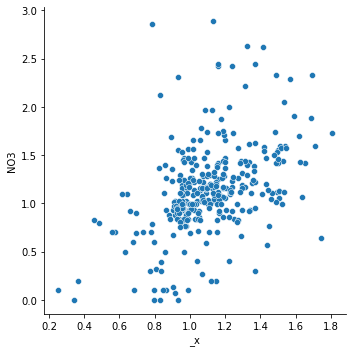

In [750]:
sns.relplot(x=preds, y=test_y)

In [751]:
# 交差検証とgridsearch　
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
rf_tune_params = {'n_estimators': [8, 16, 32, 64, 128, 256, 512]}
clf = GridSearchCV(model, rf_tune_params, cv=rkf)
clf.fit(train_x, train_y)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': [8, 16, 32, 64, 128, 256, 512]})

In [397]:
pd.DataFrame.from_dict(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032306,0.023712,0.002708,0.002690,8,{'n_estimators': 8},-0.031013,0.236369,0.076475,0.152165,...,-0.150472,0.248644,-0.007681,0.256492,0.103881,-0.088485,0.129752,0.084439,0.122046,7
1,0.039732,0.008983,0.001938,0.000487,16,{'n_estimators': 16},0.058172,0.227507,0.121106,0.195538,...,-0.124657,0.268094,0.024739,0.278699,0.166254,-0.053652,0.180144,0.129872,0.110976,6
2,0.058987,0.002100,0.001976,0.000107,32,{'n_estimators': 32},0.060728,0.222429,0.164533,0.187614,...,-0.027328,0.297238,0.003011,0.290812,0.199488,-0.057721,0.219639,0.148842,0.106657,5
3,0.123994,0.016955,0.003943,0.002054,64,{'n_estimators': 64},0.071579,0.213195,0.214924,0.246256,...,-0.029009,0.265634,0.031213,0.303306,0.179321,-0.047092,0.227201,0.160848,0.104635,4
4,0.321886,0.089838,0.009760,0.003882,128,{'n_estimators': 128},0.064633,0.216828,0.197338,0.212665,...,-0.001506,0.262017,0.028793,0.301584,0.181037,-0.029089,0.232670,0.163445,0.097576,3
5,0.600918,0.126636,0.015478,0.004998,256,{'n_estimators': 256},0.075477,0.210672,0.201758,0.216280,...,0.011477,0.259309,0.042976,0.311042,0.184718,-0.014551,0.237688,0.167857,0.093183,1
6,0.955183,0.038844,0.022578,0.001009,512,{'n_estimators': 512},0.081107,0.198577,0.198157,0.214376,...,0.011512,0.253966,0.065865,0.317458,0.180242,-0.019172,0.249389,0.166802,0.091573,2


In [398]:
# gridseachのベストの結果でモデル作り直し
best_model = clf.best_estimator_
best_model.fit(train_x, train_y)

RandomForestRegressor(n_estimators=256, random_state=42)

In [399]:
# 各波長の影響度確認
pd.DataFrame.from_dict(dict(zip(band_cols, [[f] for f in best_model.feature_importances_])))

,B2,B3,B4,B8,B11,B12
0,0.179407,0.137344,0.150318,0.213748,0.163537,0.155646


In [400]:
best_preds = best_model.predict(test_x)
print(f'rmse: {rmse(test_y, best_preds)}')
print(f'rsquared: {r2_score(test_y, best_preds)}')

rmse: 0.17950797565967153
rsquared: 0.185163991975


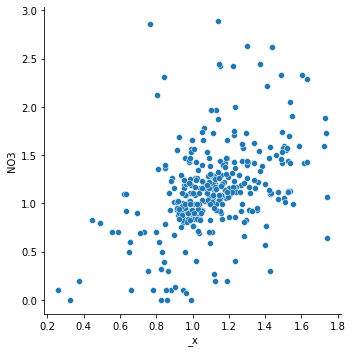

In [401]:
sns.relplot(x=best_preds, y=test_y)

In [402]:
# 事前に分けてた予測用のデータで予測
pred_df["pred" + target_col] = best_model.predict(pred_df[band_cols])


/tmp/ipykernel_361/1100787620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df["pred" + target_col] = best_model.predict(pred_df[band_cols])


In [403]:
pred_df

,longitude,latitude,B2,B3,B4,B8,B11,B12,predpH1,predNH4,predNO3
0,140.023143,40.271609,765,1120,916,3237,1878,1283,6.558086,1.677785,0.471540
1,140.079917,40.280592,702,940,971,2481,2169,1451,6.161719,1.581105,1.049105
2,140.080186,40.280862,672,915,997,2408,2258,1536,6.144316,0.959406,1.092530
3,140.080366,40.281041,813,1108,1124,2910,2399,1747,6.445898,1.301197,0.953470
4,140.022335,40.275292,747,1001,986,2592,1891,1273,6.756895,1.774880,0.444921
...,...,...,...,...,...,...,...,...,...,...,...
471,140.059884,40.293887,589,851,785,2499,2287,1519,6.192598,1.648553,1.281495
472,140.059435,40.294785,633,962,885,2643,2179,1470,6.292090,1.512174,1.028978
473,140.056920,40.293169,619,940,924,2749,2052,1300,6.435977,1.476460,0.935270
474,140.067430,40.282479,549,795,710,2461,1554,935,6.374434,1.787027,2.010321


## AvailNの予測

In [853]:
lat_lon = ['longitude','latitude']
band_cols = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12']
# ここを書き換える
target_col = 'AvailN'
#
droped_target_akita = target_akita[lat_lon + band_cols + [target_col]]
droped_train_data2 = droped_train_data.dropna(subset=[target_col])
droped_train_data2 = droped_train_data2[band_cols + [target_col]]
ddf_concat = pd.concat([droped_target_akita, droped_train_data2])

In [854]:
# 予測用のデータを分ける このpred_dに学習したモデルを適用して予測値をappendしていく
pred_d= ddf_concat[ddf_concat[target_col].isnull()]
# latlon 入っていない行は教師データ、教師データでも一部教師データがない列がある　concatする前にDropが必要
d = ddf_concat.dropna(subset=[target_col])
d.isna().sum()

longitude    905
latitude     905
B2             0
B3             0
B4             0
B8             0
B11            0
B12            0
AvailN         0
dtype: int64

In [855]:
# 異常値除去
# ｄ = ｄ.drop(ｄ[ｄ[target_col]>3.5].index)

In [856]:
train_x, test_x, train_y, test_y = train_test_split(d[band_cols], d[target_col], test_size=0.3, random_state=42, shuffle=True)

model = RandomForestRegressor(random_state=42)
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=True)
model.fit(train_x, train_y)
# gridsearch・交差検証してない予測
preds = model.predict(test_x)
print(f'rmse: {rmse(test_y, preds)}')
print(f'rsquared: {r2_score(test_y, preds)}')

rmse: 7.711565638820213
rsquared: 0.38728711990097353


In [857]:
# パイプラインでの予測
XX = d[band_cols]
YY = d[target_col]
scores, pred_df = pipe_score_predict(XX,YY,pred_df)
scores

,train_rmse,test_rmse,train_r2_score,test_r2_score
Rfr,7.803992,8.955513,0.540540,0.288451
Gbr,2.867567,8.620561,0.831172,0.315064
Xgb,5.174640,9.166535,0.695343,0.271684


In [864]:
pred_df

,longitude,latitude,B2,B3,B4,B8,B11,B12,predpH1,predEC,predNH4,predNO3,predAvailN,predAvailP1
0,140.023143,40.271609,765,1120,916,3237,1878,1283,6.515323,0.043513,1.659012,0.739670,4.295100,38.571441
1,140.079917,40.280592,702,940,971,2481,2169,1451,6.214794,0.050601,1.284878,0.920936,5.165275,37.241895
2,140.080186,40.280862,672,915,997,2408,2258,1536,6.265614,0.049731,1.117017,1.047509,5.395468,60.113585
3,140.080366,40.281041,813,1108,1124,2910,2399,1747,6.429461,0.047443,1.330607,0.971422,4.219363,86.859192
4,140.022335,40.275292,747,1001,986,2592,1891,1273,6.538059,0.047738,1.552538,0.857890,5.014323,32.313130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,140.059884,40.293887,589,851,785,2499,2287,1519,6.277952,0.051777,1.233729,1.123527,5.311815,74.656837
470,140.059435,40.294785,633,962,885,2643,2179,1470,6.277745,0.048702,1.256500,1.046858,5.136665,65.642165
471,140.056920,40.293169,619,940,924,2749,2052,1300,6.379563,0.050026,1.533884,1.026730,5.078821,74.345505
472,140.067430,40.282479,549,795,710,2461,1554,935,6.387747,0.049978,1.452588,1.308849,5.077585,73.569011


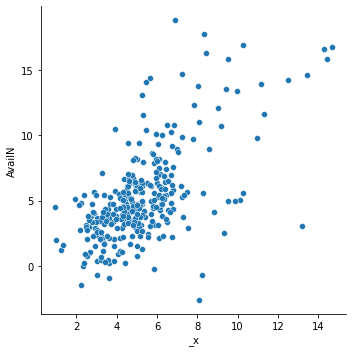

In [412]:
sns.relplot(x=preds, y=test_y)

## AvailPの予測

In [859]:
lat_lon = ['longitude','latitude']
band_cols = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12']
# ここを書き換える
target_col = 'AvailP1'
#
droped_target_akita = target_akita[lat_lon + band_cols + [target_col]]
droped_train_data2 = droped_train_data.dropna(subset=[target_col])
droped_train_data2 = droped_train_data2[band_cols + [target_col]]
ddf_concat = pd.concat([droped_target_akita, droped_train_data2])

In [860]:
# 予測用のデータを分ける このpred_dに学習したモデルを適用して予測値をappendしていく
pred_d= ddf_concat[ddf_concat[target_col].isnull()]
# latlon 入っていない行は教師データ、教師データでも一部教師データがない列がある　concatする前にDropが必要
d = ddf_concat.dropna(subset=[target_col])
d.isna().sum()

longitude    884
latitude     884
B2             0
B3             0
B4             0
B8             0
B11            0
B12            0
AvailP1        0
dtype: int64

In [861]:
# 異常値除去
ｄ = ｄ.drop(ｄ[ｄ[target_col]>200].index)

In [862]:
train_x, test_x, train_y, test_y = train_test_split(d[band_cols], d[target_col], test_size=0.3, random_state=42, shuffle=True)

model = RandomForestRegressor(random_state=42)
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=True)
model.fit(train_x, train_y)
# gridsearch・交差検証してない予測
preds = model.predict(test_x)
print(f'rmse: {rmse(test_y, preds)}')
print(f'rsquared: {r2_score(test_y, preds)}')

rmse: 1200.1430957367343
rsquared: 0.17168773253069003


In [863]:
# パイプラインでの予測
XX = d[band_cols]
YY = d[target_col]
scores, pred_df = pipe_score_predict(XX,YY,pred_df)
scores

,train_rmse,test_rmse,train_r2_score,test_r2_score
Rfr,1047.158211,1244.878140,0.391767,0.140813
Gbr,1219.993098,1288.229059,0.291377,0.110893
Xgb,1137.196870,1275.344896,0.339469,0.119785


In [ ]:
pred_df

,longitude,latitude,B2,B3,B4,B8,B11,B12,predpH1,predEC,predNH4,predNO3,predAvailN
0,140.023143,40.271609,765,1120,916,3237,1878,1283,6.515323,0.043513,1.659012,0.739670,4.295100
1,140.079917,40.280592,702,940,971,2481,2169,1451,6.214794,0.050601,1.284878,0.920936,5.165275
2,140.080186,40.280862,672,915,997,2408,2258,1536,6.265614,0.049731,1.117017,1.047509,5.395468
3,140.080366,40.281041,813,1108,1124,2910,2399,1747,6.429461,0.047443,1.330607,0.971422,4.219363
4,140.022335,40.275292,747,1001,986,2592,1891,1273,6.538059,0.047738,1.552538,0.857890,5.014323
...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,140.059884,40.293887,589,851,785,2499,2287,1519,6.277952,0.051777,1.233729,1.123527,5.311815
470,140.059435,40.294785,633,962,885,2643,2179,1470,6.277745,0.048702,1.256500,1.046858,5.136665
471,140.056920,40.293169,619,940,924,2749,2052,1300,6.379563,0.050026,1.533884,1.026730,5.078821
472,140.067430,40.282479,549,795,710,2461,1554,935,6.387747,0.049978,1.452588,1.308849,5.077585


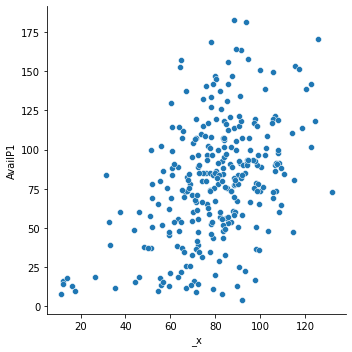

In [439]:
sns.relplot(x=preds, y=test_y)

## TCの予測

In [865]:
lat_lon = ['longitude','latitude']
band_cols = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12']
# ここを書き換える
target_col = 'TC'
#
droped_target_akita = target_akita[lat_lon + band_cols + [target_col]]
droped_train_data2 = droped_train_data.dropna(subset=[target_col])
droped_train_data2 = droped_train_data2[band_cols + [target_col]]
ddf_concat = pd.concat([droped_target_akita, droped_train_data2])

In [866]:
# 予測用のデータを分ける このpred_dに学習したモデルを適用して予測値をappendしていく
pred_d= ddf_concat[ddf_concat[target_col].isnull()]
# latlon 入っていない行は教師データ、教師データでも一部教師データがない列がある　concatする前にDropが必要
d = ddf_concat.dropna(subset=[target_col])
d.isna().sum()

longitude    859
latitude     859
B2             0
B3             0
B4             0
B8             0
B11            0
B12            0
TC             0
dtype: int64

In [867]:
train_x, test_x, train_y, test_y = train_test_split(d[band_cols], d[target_col], test_size=0.3, random_state=42, shuffle=True)

model = RandomForestRegressor(random_state=42)
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=True)
model.fit(train_x, train_y)
# gridsearch・交差検証してない予測
preds = model.predict(test_x)
print(f'rmse: {rmse(test_y, preds)}')
print(f'rsquared: {r2_score(test_y, preds)}')

rmse: 0.6638701454617487
rsquared: 0.5325429546190801


In [868]:
# パイプラインでの予測
XX = d[band_cols]
YY = d[target_col]
scores, pred_df = pipe_score_predict(XX,YY,pred_df)
scores

,train_rmse,test_rmse,train_r2_score,test_r2_score
Rfr,0.463241,0.779259,0.672258,0.451293
Gbr,0.046792,0.674222,0.966894,0.525254
Xgb,0.032170,0.688901,0.977240,0.514918


In [869]:
pred_df

,longitude,latitude,B2,B3,B4,B8,B11,B12,predpH1,predEC,predNH4,predNO3,predAvailN,predAvailP1,predTC
0,140.023143,40.271609,765,1120,916,3237,1878,1283,6.515323,0.043513,1.659012,0.739670,4.295100,38.571441,0.984321
1,140.079917,40.280592,702,940,971,2481,2169,1451,6.214794,0.050601,1.284878,0.920936,5.165275,37.241895,2.747207
2,140.080186,40.280862,672,915,997,2408,2258,1536,6.265614,0.049731,1.117017,1.047509,5.395468,60.113585,2.081207
3,140.080366,40.281041,813,1108,1124,2910,2399,1747,6.429461,0.047443,1.330607,0.971422,4.219363,86.859192,2.723402
4,140.022335,40.275292,747,1001,986,2592,1891,1273,6.538059,0.047738,1.552538,0.857890,5.014323,32.313130,1.594119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,140.059884,40.293887,589,851,785,2499,2287,1519,6.277952,0.051777,1.233729,1.123527,5.311815,74.656837,4.334195
470,140.059435,40.294785,633,962,885,2643,2179,1470,6.277745,0.048702,1.256500,1.046858,5.136665,65.642165,3.067570
471,140.056920,40.293169,619,940,924,2749,2052,1300,6.379563,0.050026,1.533884,1.026730,5.078821,74.345505,2.277746
472,140.067430,40.282479,549,795,710,2461,1554,935,6.387747,0.049978,1.452588,1.308849,5.077585,73.569011,2.856101


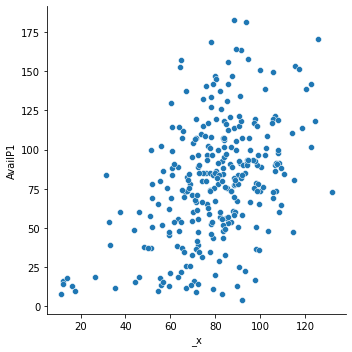

In [ ]:
sns.relplot(x=preds, y=test_y)

## TNの予測

In [870]:
lat_lon = ['longitude','latitude']
band_cols = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12']
# ここを書き換える
target_col = 'TN'
#
droped_target_akita = target_akita[lat_lon + band_cols + [target_col]]
droped_train_data2 = droped_train_data.dropna(subset=[target_col])
droped_train_data2 = droped_train_data2[band_cols + [target_col]]
ddf_concat = pd.concat([droped_target_akita, droped_train_data2])

In [871]:
# 予測用のデータを分ける このpred_dに学習したモデルを適用して予測値をappendしていく
pred_d= ddf_concat[ddf_concat[target_col].isnull()]
# latlon 入っていない行は教師データ、教師データでも一部教師データがない列がある　concatする前にDropが必要
d = ddf_concat.dropna(subset=[target_col])
d.isna().sum()

longitude    789
latitude     789
B2             0
B3             0
B4             0
B8             0
B11            0
B12            0
TN             0
dtype: int64

In [872]:
train_x, test_x, train_y, test_y = train_test_split(d[band_cols], d[target_col], test_size=0.3, random_state=42, shuffle=True)

model = RandomForestRegressor(random_state=42)
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=True)
model.fit(train_x, train_y)
# gridsearch・交差検証してない予測
preds = model.predict(test_x)
print(f'rmse: {rmse(test_y, preds)}')
print(f'rsquared: {r2_score(test_y, preds)}')

rmse: 0.0029223028838781546
rsquared: 0.5758845527667475


In [873]:
# パイプラインでの予測
XX = d[band_cols]
YY = d[target_col]
scores, pred_df = pipe_score_predict(XX,YY,pred_df)
scores

,train_rmse,test_rmse,train_r2_score,test_r2_score
Rfr,0.001877,0.003509,0.732271,0.490796
Gbr,0.000042,0.003424,0.993977,0.503071
Xgb,0.000146,0.003758,0.979174,0.454601


In [874]:
pred_df

,longitude,latitude,B2,B3,B4,B8,B11,B12,predpH1,predEC,predNH4,predNO3,predAvailN,predAvailP1,predTC,predTN
0,140.023143,40.271609,765,1120,916,3237,1878,1283,6.515323,0.043513,1.659012,0.739670,4.295100,38.571441,0.984321,0.078276
1,140.079917,40.280592,702,940,971,2481,2169,1451,6.214794,0.050601,1.284878,0.920936,5.165275,37.241895,2.747207,0.237449
2,140.080186,40.280862,672,915,997,2408,2258,1536,6.265614,0.049731,1.117017,1.047509,5.395468,60.113585,2.081207,0.196611
3,140.080366,40.281041,813,1108,1124,2910,2399,1747,6.429461,0.047443,1.330607,0.971422,4.219363,86.859192,2.723402,0.220761
4,140.022335,40.275292,747,1001,986,2592,1891,1273,6.538059,0.047738,1.552538,0.857890,5.014323,32.313130,1.594119,0.130562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,140.059884,40.293887,589,851,785,2499,2287,1519,6.277952,0.051777,1.233729,1.123527,5.311815,74.656837,4.334195,0.242853
470,140.059435,40.294785,633,962,885,2643,2179,1470,6.277745,0.048702,1.256500,1.046858,5.136665,65.642165,3.067570,0.244798
471,140.056920,40.293169,619,940,924,2749,2052,1300,6.379563,0.050026,1.533884,1.026730,5.078821,74.345505,2.277746,0.213128
472,140.067430,40.282479,549,795,710,2461,1554,935,6.387747,0.049978,1.452588,1.308849,5.077585,73.569011,2.856101,0.228963


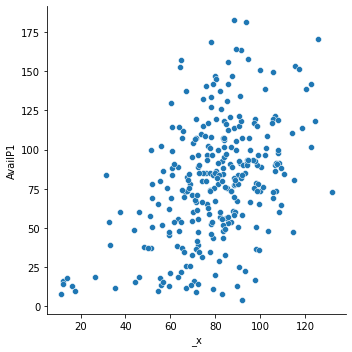

In [ ]:
sns.relplot(x=preds, y=test_y)

# 結果の出力

In [799]:
pred_df

,longitude,latitude,B2,B3,B4,B8,B11,B12,predpH1,predNH4,predAvailN,predEC,predTC,predNO3,predAvailP1,predTN
0,140.023143,40.271609,765,1120,916,3237,1878,1283,6.525367,1.690759,4.492596,0.044651,1.258207,0.750874,39.437034,0.079311
1,140.079917,40.280592,702,940,971,2481,2169,1451,6.220013,1.209540,5.183944,0.050209,2.486651,0.898489,35.891574,0.231218
2,140.080186,40.280862,672,915,997,2408,2258,1536,6.272121,1.140648,5.330614,0.049611,2.157030,1.043428,58.387685,0.198933
3,140.080366,40.281041,813,1108,1124,2910,2399,1747,6.421549,1.405295,4.190402,0.047344,2.485010,0.975313,83.357006,0.223884
4,140.022335,40.275292,747,1001,986,2592,1891,1273,6.548685,1.399749,5.126176,0.048769,1.768919,0.845123,30.792599,0.135396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,140.059884,40.293887,589,851,785,2499,2287,1519,6.273927,1.199639,5.105236,0.051776,3.918406,1.125576,73.092370,0.254894
470,140.059435,40.294785,633,962,885,2643,2179,1470,6.277856,1.248924,5.179635,0.048922,2.992195,1.050043,62.396721,0.247145
471,140.056920,40.293169,619,940,924,2749,2052,1300,6.382708,1.559362,5.044255,0.049536,2.218589,1.063348,73.912135,0.189180
472,140.067430,40.282479,549,795,710,2461,1554,935,6.384925,1.316613,5.015315,0.049659,2.727481,1.247591,75.010619,0.223601


In [875]:
pred_df.to_csv('/workspaces/akita_daizu/data/474_pred_soil.csv')